# Algoritmos Elementales de Grafos

## Funciones básicas para dibujar

In [4]:
# Necesitas instalar graphviz para correr este notebook!

from graphviz import Graph, Digraph
from IPython.display import display

# Usa esta función para dibujar un grafo no dirigido
def plotear_grafica(G, color = {}):
        grafica = Graph(graph_attr = {'size':'4'})
        for vertice in G:
            if not vertice in color or color[vertice] == 'white':
                grafica.node(vertice)
            else:
                if color[vertice] == 'black':
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice], 
                                 fontcolor = 'white')
                else:
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice])
        for n1 in G:
            for n2 in G[n1]:
                if n1 < n2:
                    grafica.edge(n1, n2)
        display(grafica)

# Usa esta para dibujar un grafo dirigido (Árboles para esta tarea)
def plotear_graficad(p):
        grafica = Digraph(graph_attr = {'size':'3'})
        for v1 in p:
            if p[v1] <> None:
                for v2 in p[v1]:
                    grafica.edge(v2, v1)
        display(grafica)

## Ejemplo de un grafo

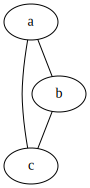

In [5]:
def make_link(G, v1, v2):
    if v1 not in G:
        G[v1] = {}
    (G[v1])[v2] = 1
    if v2 not in G:
        G[v2] = {}
    (G[v2])[v1] = 1
    return G

aristas = [('a', 'b'), ('b', 'c'), ('a', 'c')]

GX = {'c':{}}
for v1, v2 in aristas:
    make_link(GX, v1, v2)

plotear_grafica(GX, {})

## 1.- (5pts) Dibuje el siguiente grafo:

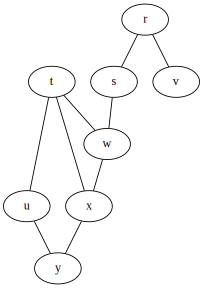

In [7]:
# ESCRIBE TÚ CÓDIGO AQUÍ!

Edges=[('r','v'),('r','s'), ('s','w'), ('t','w'), ('t','x'), ('t','u'), ('w','x'), ('u','y'), ('x','y'),]
G1={'r':{}}
for v1, v2 in Edges:
  make_link(G1,v1,v2)
#print G1
plotear_grafica(G1, {})

## 2.- (5pts) Implemente DFS: Tú código debe reproducir la salida de la segunda celda.

In [18]:
def DFS_V(G, vertice, color):
    color[vertice]='gray'
    plotear_grafica(G,color)
    print('Se descubrio el nodo ' )
    print(vertice)
    
    for v in G[vertice]:
      if color[v]=='white':
        DFS_V(G,v, color)
    color[vertice]='black'
    plotear_grafica(G, color)



def DFS(G, vertice, color):
    DFS_V(G,vertice, color)
    nodos_visitados=0
    for v in G:
      if color[v]=='black':
        nodos_visitados+=1
    return nodos_visitados

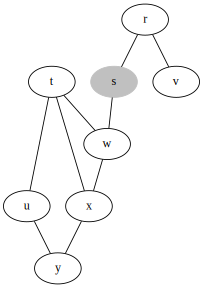

Se descubrio el nodo 
s


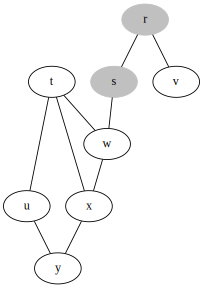

Se descubrio el nodo 
r


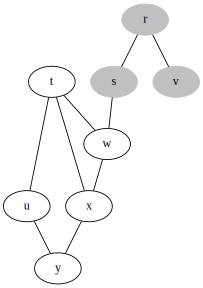

Se descubrio el nodo 
v


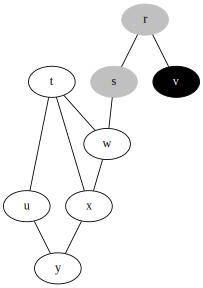

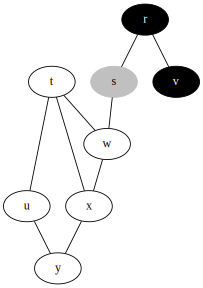

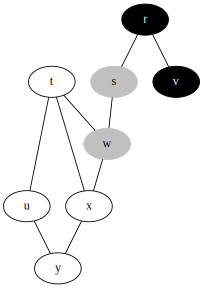

Se descubrio el nodo 
w


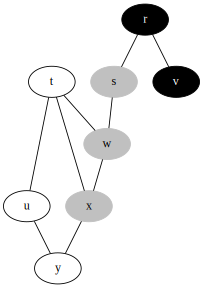

Se descubrio el nodo 
x


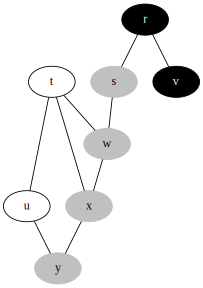

Se descubrio el nodo 
y


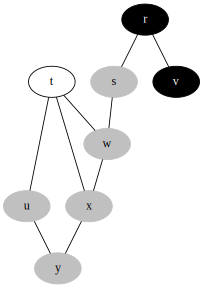

Se descubrio el nodo 
u


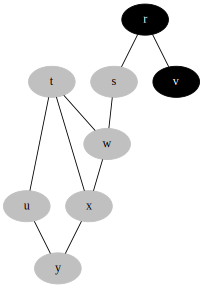

Se descubrio el nodo 
t


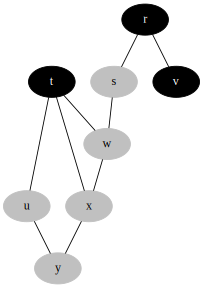

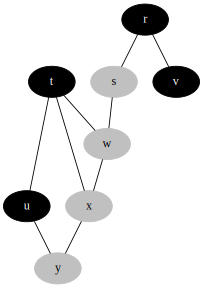

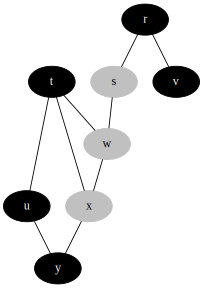

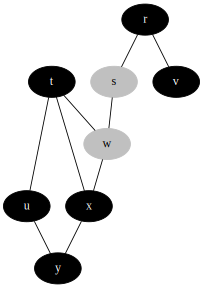

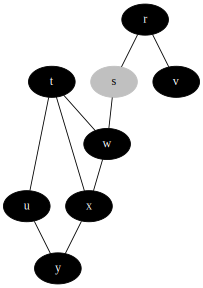

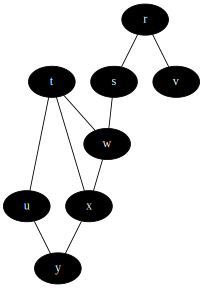

Número de nodos visitados: 8


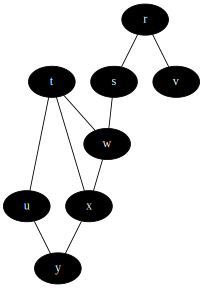

In [19]:
# Tú código debe reproducir la salida de esta celda!

# Inicialmente ponemos todos los nodos en blanco (No visitados)
colores = {}
for v in G1:
    colores[v] = 'white'
    
# Ejecutar DFS arrancando de "s". DFS, debe marcar en gris los nodos descubiertos pero no terminados, 
# y en negro los nodos terminados.
numero_nodos = DFS(G1, 's', colores)

print "Número de nodos visitados:", numero_nodos

plotear_grafica(G1, colores)

## 3.- (10pts) Utiliza DFS para crear una función que determine el número de componentes conectados en un grafo. Reproduce la salida de la celda.

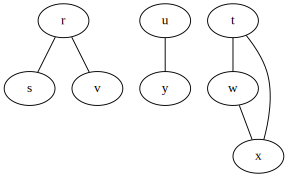

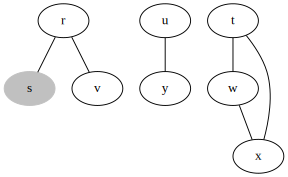

Se descubrio el nodo 
s


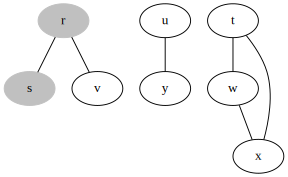

Se descubrio el nodo 
r


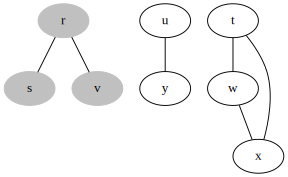

Se descubrio el nodo 
v


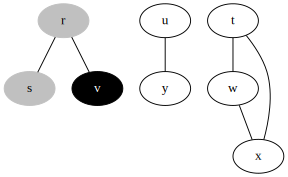

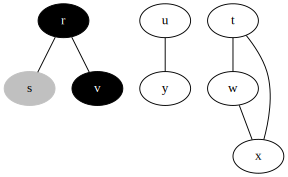

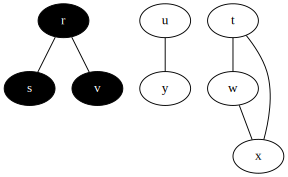

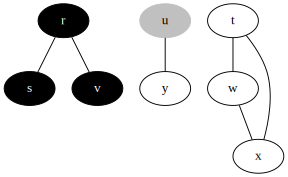

Se descubrio el nodo 
u


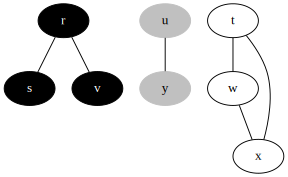

Se descubrio el nodo 
y


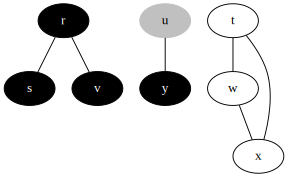

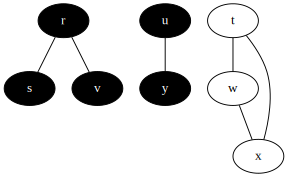

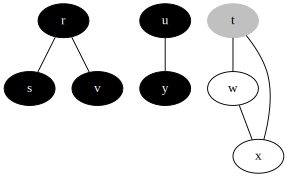

Se descubrio el nodo 
t


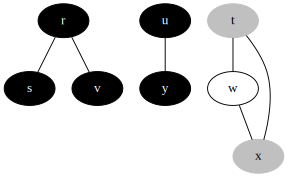

Se descubrio el nodo 
x


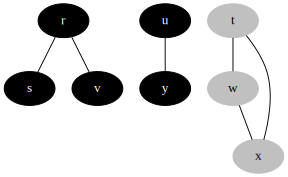

Se descubrio el nodo 
w


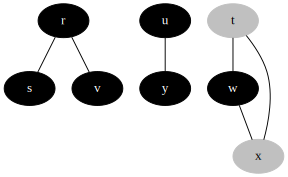

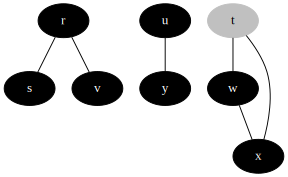

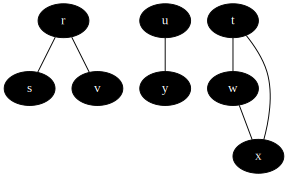

Número de componentes conectados:  3


In [20]:
def connected_components(G):
    color={}
    numero_componentes_conectados=0
    for v in G:
      color[v]='white'
    for v in G:
      if color[v]=='white':
        DFS(G,v,color)
        numero_componentes_conectados+=1
    return numero_componentes_conectados

Edgos=[('r','v'),('r','s'),  ('t','w'), ('t','x'),  ('w','x'), ('u','y'), ]
G3={'r':{}}
for v1, v2 in Edgos:
  make_link(G3,v1,v2)

plotear_grafica(G3, {})

componentes_conectadas = connected_components(G3)
print "Número de componentes conectados: ", componentes_conectadas

## 4.- (10pts) Utilice DFS para construir una función que determine si existe un camino que conecte dos nodos.

In [23]:
def conectado(G, v1, v2):
    color={}
    flag_conectado=False
    for v in G:
      color[v]='white'
    DFS(G, v1, color)
    if color[v2]=='black':
      flag_conectado=True
    return flag_conectado
        

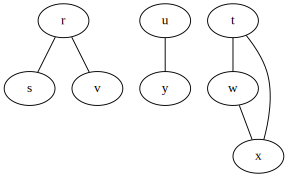

En el grafo, existe un camino de v a s?
Explorando con DFS ...


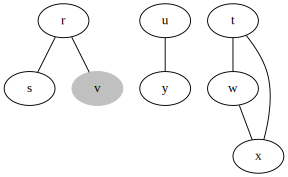

Se descubrio el nodo 
v


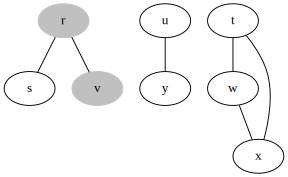

Se descubrio el nodo 
r


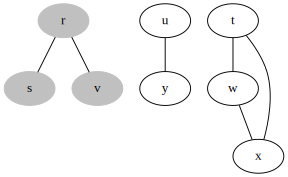

Se descubrio el nodo 
s


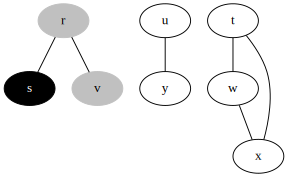

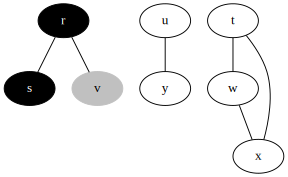

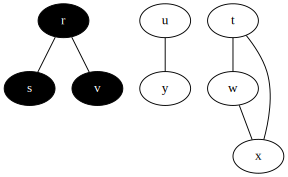

RESPUESTA: True
------------------------------------------------
En el grafo, existe un camino de v a y?
Explorando con DFS ...


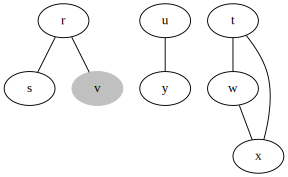

Se descubrio el nodo 
v


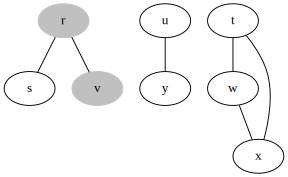

Se descubrio el nodo 
r


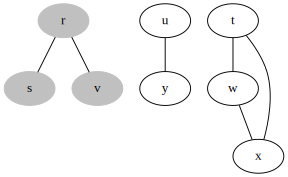

Se descubrio el nodo 
s


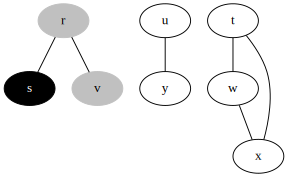

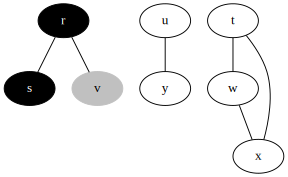

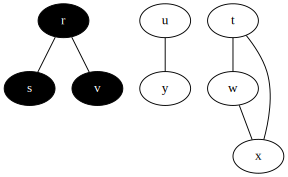

RESPUESTA: False


In [25]:
Edgus=[('r','v'),('r','s'),  ('t','w'), ('t','x'),  ('w','x'), ('u','y'), ('t','u'), ('y','x')]
G2={'r':{}}
for v1, v2 in Edgos:
  make_link(G2,v1,v2)



#print "Construya el siguiente grafo:"
plotear_grafica(G2)
print "En el grafo, existe un camino de v a s?"
print "Explorando con DFS ..."
r1=conectado(G2, 'v', 's')
print "RESPUESTA:", r1
print "------------------------------------------------"
print "En el grafo, existe un camino de v a y?" 
print "Explorando con DFS ..."
r2=conectado(G2, 'v', 'y')
print "RESPUESTA:", r2

## 5.- (10pts) Implemente BFS y reproduzca la salida mostrada. Especialmente, el número de nodos visitados, la lista de padres, y el nivel de capa de cada nodo

In [32]:
def BFS(G, vertice):
  color={}
  padres={}
  nivelcapas={}
  for v in G:
    color[v]='white'
    padres[v]=None
    nivelcapas[v]=0
  color[vertice]='gray'
  nodosvisitados=1
  plotear_grafica(G, color)
  Q=[]
  Q.append(vertice)
  while Q!=[]:
    u=Q.pop(0)
    for v in G[u]:
      if color[v]=='white':
        color[v]='gray'
        padres[v]=u
        nivelcapas[v]=nivelcapas[u]+1
        Q.append(v)
        nodosvisitados+=1
    color[u]='black'
    plotear_grafica(G, color)
    # Aquí va tú código
  return nodosvisitados, padres, nivelcapas

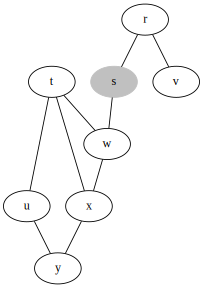

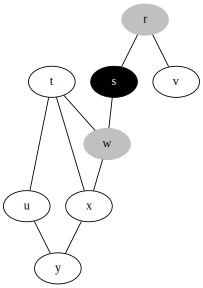

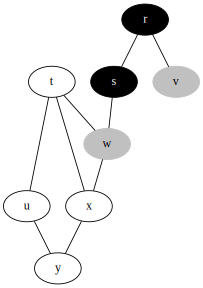

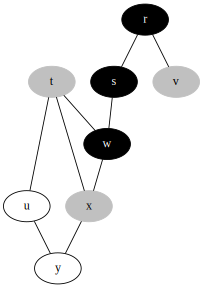

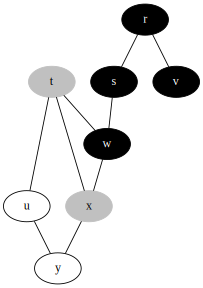

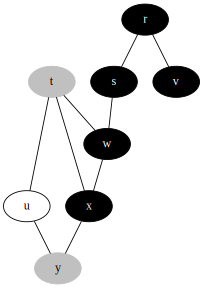

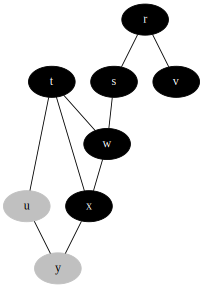

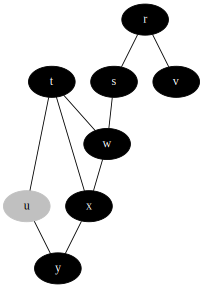

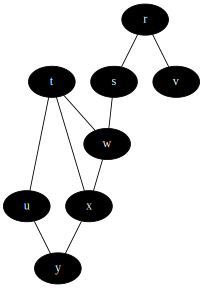

Número de nodos visitados: 8
Padres de los nodos en el árbol de búsqueda: {'s': None, 'r': 's', 'u': 't', 't': 'w', 'w': 's', 'v': 'r', 'y': 'x', 'x': 'w'}
Nivel de la capa en la exploración: {'s': 0, 'r': 1, 'u': 3, 't': 2, 'w': 1, 'v': 2, 'y': 3, 'x': 2}


In [33]:
#print "Este es un ejemplo de la salida:"
n,p,d=BFS(G1, 's')
print "Número de nodos visitados:", n
print "Padres de los nodos en el árbol de búsqueda:", p
print "Nivel de la capa en la exploración:", d


## 6.- (10pts) Implemente un DFS y reproduzca la salida mostrada. Especialmente,  la estructura de PARENTESIS de los nodos visitados, la lista de padres, las listas del tiempo en que fueron descubiertos (d) y terminados (f) los nodos, y el árbol de búsqueda a través de la función plotear_grafod(

Estructura de paréntesis de la exploración DFS: 
( s
( r
( v
v )
r )
( w
( x
( y
( u
( t
t )
u )
y )
x )
w )
s )
Padres según el árbol de búsqueda: {'s': None, 'r': 's', 'u': 'y', 't': 'u', 'w': 's', 'v': 'r', 'y': 'x', 'x': 'w'}
Tiempo en que fue descubierto cada nodo: {'s': 1, 'r': 2, 'u': 9, 't': 10, 'w': 6, 'v': 3, 'y': 8, 'x': 7}
Tiempo en que fue terminado cada nodo {'s': 16, 'r': 5, 'u': 12, 't': 11, 'w': 15, 'v': 4, 'y': 13, 'x': 14}


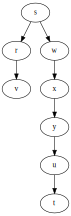

In [51]:
tiempo = 0


def changeglobaltime():
  global time
  time+=1

def reestablecertime():
  global time
  time=0

def DFS_Vtt(G, vertice, color, padres, d, f):
    changeglobaltime()
    d[vertice]=time
    color[vertice]='gray'
    print'(', vertice
    
    for v in G[vertice]:
      if color[v]=='white':
        padres[v]=vertice
        DFS_Vtt(G,v, color, padres, d, f)
    color[vertice]='black'
    changeglobaltime()
    f[vertice]=time
    print vertice, ')'

def DFS_timestamp(G, nodo, color, padres, d, f):
    for v in G:
      color[v]='white'
      padres[v]=None
      d[v]=0
      f[v]=0
    
    DFS_Vtt(G,nodo, color, padres, d, f)
    numeronodosvisitados=0
    for v in G:
      if color[v]=='black':
        numeronodosvisitados+=1
    reestablecertime()
    return numeronodosvisitados

color = {}
d = {}
f = {}
padres = {}

print "Estructura de paréntesis de la exploración DFS: "
DFS_timestamp(G1, 's', color, padres, d, f)

print "Padres según el árbol de búsqueda:", padres
print "Tiempo en que fue descubierto cada nodo:",d
print "Tiempo en que fue terminado cada nodo", f
plotear_graficad(padres)
